In [1]:
# # @title Montaje de drive y carga de requerimientos
# from google.colab import drive
# drive.mount('/content/drive')

# !pip install -r '/content/drive/MyDrive/tfm_data_scientist/requirements_colab.txt' -q

# # Insert the directory
# import sys
# sys.path.insert(0,'/content/drive/MyDrive/tfm_data_scientist/notebook')

# 01. Librerías

In [2]:
import os
import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from common.utils import *

In [3]:
tf.__version__

'2.10.1'

In [4]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz-11.0.0-win64/bin/'

In [5]:

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Num GPUs Available:  1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

# 02. Carga de datos

In [6]:
path_input = os.path.join(os.path.dirname(os.getcwd()), 'data/input/')
path_output = os.path.join(os.path.dirname(os.getcwd()), 'data/output/')
path_model = os.path.join(os.path.dirname(os.getcwd()), 'data/model/')
path_img = os.path.join(os.path.dirname(os.getcwd()), 'img/')

# # colab path
# path_input = '/content/drive/MyDrive/tfm_data_scientist/data/input/'
# path_output = '/content/drive/MyDrive/tfm_data_scientist/data/output/'

In [7]:
# dataset ML
X = pd.read_csv(path_output + 'X_train.csv' , low_memory=False)
y = pd.read_csv(path_output + 'y_train.csv' , low_memory=False)

# # dataset NN
# X = pd.read_csv(path_output + 'X_train_nn.csv' , low_memory=False)
# y = pd.read_csv(path_output + 'y_train_nn.csv' , low_memory=False)

In [8]:
# Opening JSON file
with open(f'{path_output}true_label.json', 'r') as openfile:
    # Reading from json file
    json_object = json.load(openfile)
 
print(json_object)

{'good': 0.0, 'standard': 1.0, 'poor': 2.0}


In [9]:
true_label = list(json_object.keys())
classes = list(json_object.values())
print(true_label, classes)

['good', 'standard', 'poor'] [0.0, 1.0, 2.0]


In [10]:
pd.concat([X, y], axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120054 entries, 0 to 120053
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      120054 non-null  float64
 1   Annual_Income            120054 non-null  float64
 2   Monthly_Inhand_Salary    120054 non-null  float64
 3   Num_Bank_Accounts        120054 non-null  float64
 4   Num_Credit_Card          120054 non-null  float64
 5   Interest_Rate            120054 non-null  float64
 6   Num_of_Loan              120054 non-null  float64
 7   Delay_from_due_date      120054 non-null  float64
 8   Num_of_Delayed_Payment   120054 non-null  float64
 9   Changed_Credit_Limit     120054 non-null  float64
 10  Num_Credit_Inquiries     120054 non-null  float64
 11  Credit_Mix               120054 non-null  float64
 12  Outstanding_Debt         120054 non-null  float64
 13  Credit_History_Age       120054 non-null  float64
 14  Paym

In [11]:
print(X.shape, y.shape)

(120054, 18) (120054, 1)


# 03. Preparación de datos

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 04. Fine-Tuning ML

## 04.01. Implementación de grilla

In [13]:
# model = RandomForestClassifier(n_jobs=-1, random_state=42)

# model.fit(X_train, y_train)

In [14]:
# # parametros utilizados en el modelo
# print('Parámetros en uso actualmente:\n')
# print(model.get_params())

**Grilla completa**

In [15]:
# # número de árboles
# n_estimators = [int(x) for x in np.linspace(start = 400, stop = 800, num = 5)]
# # número de características a tener en cuenta en cada división
# max_features = ['sqrt', 'log2']
# # número máximo de niveles en el árbol
# max_depth = [int(x) for x in np.linspace(15, 35,5)]
# # número mínimo de muestras necesarias para dividir un nodo
# min_samples_split = [2, 3]
# # número mínimo de muestras necesarias en cada nodo
# min_samples_leaf = [1, 2]
# # Grilla
# grid_param = {
#               'n_estimators':      n_estimators,
#               'max_features':      max_features,
#               'max_depth':         max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf':  min_samples_leaf,
#               'criterion':         ['entropy','gini']
#               }

# grid_param

**Grilla reducida**

In [16]:
# grid_param = {
#     'n_estimators': [240, 250, 270],
#     'criterion': ['gini'],
#     'max_depth': [43, 45, 47],
#     'max_features': ['log2'],
# }

# grid_param = {
#     'n_estimators': [150, 200, 250, 300],
#     'criterion': ['gini', 'log_loss', 'entropy'],
#     'max_depth': [25, 35, 40, 45],
#     'max_features': ['log2', 'sqrt'],
# }

In [17]:
# # separacion del dataset para comprobación crizada repetida
# stratified_kfold = StratifiedKFold(n_splits=5,
#                                    shuffle=True,
#                                    random_state=42)

In [18]:
# model_grid = GridSearchCV(estimator=model,
#                           param_grid= grid_param, # grid_param,
#                           scoring='accuracy', # f1_macro
#                           cv=stratified_kfold,
#                           n_jobs=4)

In [19]:
# model_grid.fit(X_train, y_train)

In [20]:
# print(model_grid.best_params_)
# best_model = model_grid.best_estimator_

In [21]:
# y_proba_best = best_model.predict_proba(X_test)
# classes_best = best_model.classes_

# # evaluación best model
# roc_auc_score(y_test, y_proba_best, labels = classes_best, multi_class = 'ovr', average = 'macro').round(4)

## 04.02. Best Model Test

> **Best Hiperparamteros RandomForest:**<br>
**Versión 01**: criterion='entropy', max_depth=40, max_features= 'sqrt', n_estimators=300, random_state=42<br>
**Versión 02**: criterion='log_loss', max_depth=40, max_features= 'log2', n_estimators=200, random_state=42<br>
**Versión 03**: criterion='gini', max_depth=45, max_features= 'log2', n_estimators=250, random_state=42<br>
**Versión 04**: criterion='gini', max_depth=45, max_features= 'log2', n_estimators=270, random_state=42

In [22]:
# best_model = OneVsOneClassifier(n_jobs=-1, estimator=RandomForestClassifier(criterion='entropy', max_depth=40, max_features= 'sqrt', n_estimators=300, random_state=42))
# best_model = OneVsOneClassifier(n_jobs=-1, estimator=RandomForestClassifier(criterion='gini', max_depth=45, max_features= 'log2', n_estimators=250, random_state=42))
best_model = RandomForestClassifier(n_jobs=-1, criterion='gini', max_depth=45, max_features= 'log2', n_estimators=250, random_state=42)
# best_model = RandomForestClassifier(n_jobs=-1, criterion='gini', max_depth=45, max_features= 'log2', n_estimators=270, random_state=42)


best_model.fit(X_train, y_train)

c:\Users\jarl1\Git\GitHub\tfm_data_scientist\tfm-venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=45, max_features='log2', n_estimators=250,
                       n_jobs=-1, random_state=42)

In [23]:
# let's create a dictionary of features and their importance values
feat_dict= {}
for col, val in sorted(zip(X_train.columns, best_model.feature_importances_),key=lambda x:x[1],reverse=True): # best_model.estimators_[1].feature_importances_
  feat_dict[col]=val
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})

feat_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
0,Outstanding_Debt,0.120201
1,Credit_Mix,0.106411
2,Interest_Rate,0.101291
3,Credit_History_Age,0.067872
4,Delay_from_due_date,0.067149
5,Num_Credit_Inquiries,0.053334
6,Changed_Credit_Limit,0.047717
7,Num_of_Delayed_Payment,0.044825
8,Amount_invested_monthly,0.042830
9,Num_Credit_Card,0.042552


In [24]:
# # esta linea se utilizo para aislar aquellas variables que estabna por bajo a las variables aleatrorias introducidas en el punto 07.01
# # el resultado de este listado se puede ver en la variable: VarDrop 
# feat_df.sort_values(by='Importance', ascending=False).Feature[18:].values.tolist()

## 04.03. Evaluación de modelo

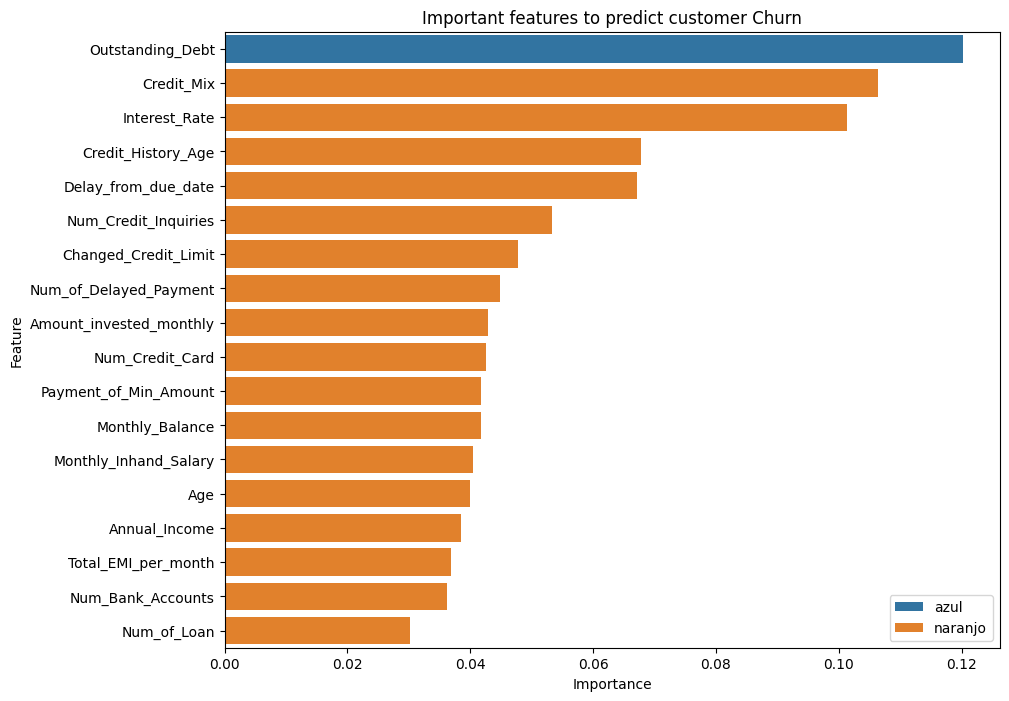

In [25]:
values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,8))
clrs = ['naranjo' if (x < max(values)) else 'azul' for x in values ]
sns.barplot(y=idx,x=values,hue=clrs).set(title='Important features to predict customer Churn')
plt.show()

In [26]:
y_proba = best_model.predict_proba(X_test)
y_pred = best_model.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred, target_names=true_label))

              precision    recall  f1-score   support

        good       0.89      0.94      0.92      8003
    standard       0.87      0.79      0.83      8004
        poor       0.88      0.92      0.90      8004

    accuracy                           0.88     24011
   macro avg       0.88      0.88      0.88     24011
weighted avg       0.88      0.88      0.88     24011



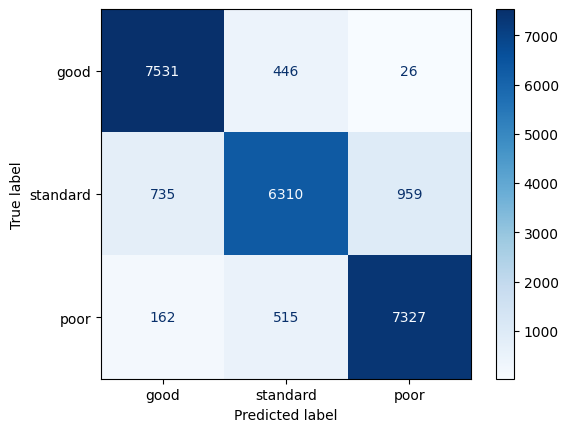

In [28]:
cm = confusion_matrix(y_test, y_pred, normalize=None)
cmd = ConfusionMatrixDisplay(cm, display_labels=true_label)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

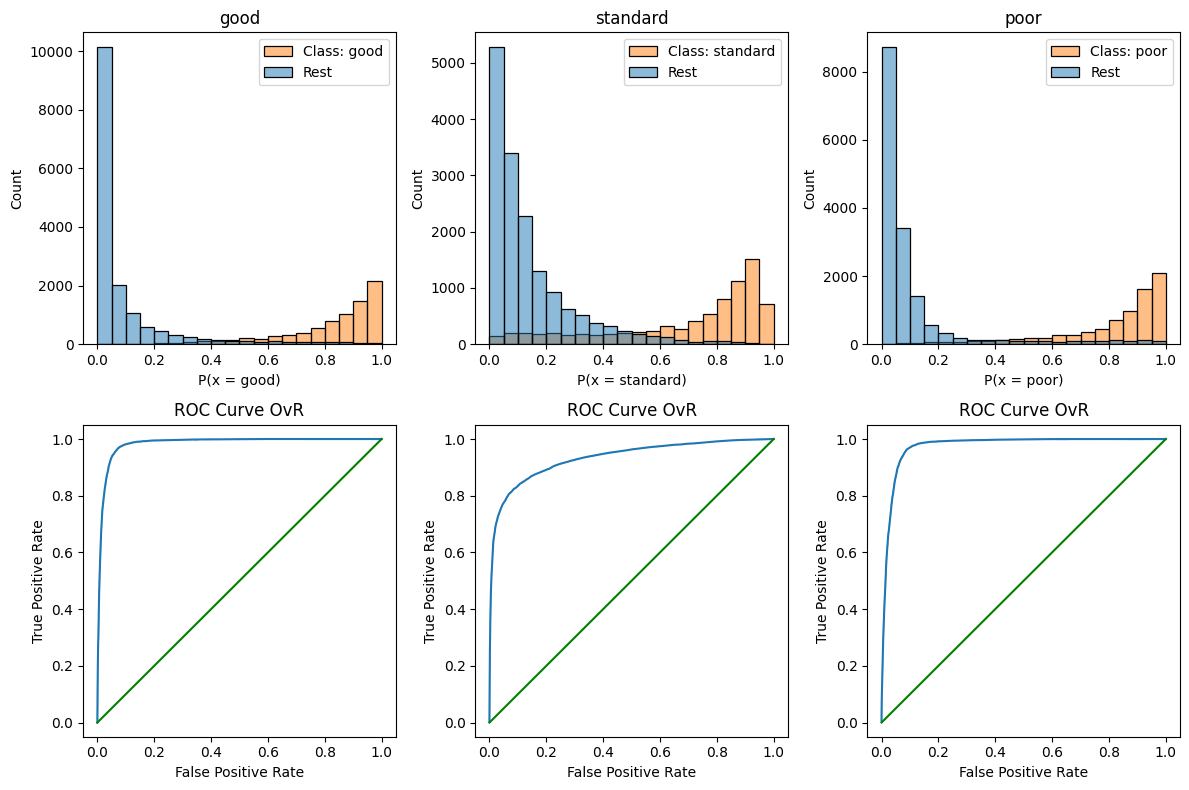

In [29]:
# gráficos de distribuciones de probabilidad y curvas ROC / uno frente al resto
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # extrae las clases
    c = classes[i]
    l = true_label[i]
    
    # prepara un DataFrame auxiliar para ayudar con los gráficos
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test.values]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # gráficar la distribución de probabilidad para cada clase vs el resto
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux , hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(l)
    ax.legend([f"Class: {l}", "Rest"])
    ax.set_xlabel(f"P(x = {l})")
    
    # cálculo de las curvas ROC
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [30]:
# from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, roc_curve

# print(precision_score(y_test, y_pred, average='weighted'))
# print(recall_score(y_test, y_pred, average='micro'))
# print(accuracy_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

# conf_matrix = confusion_matrix(y_test, y_pred)
# {"0" : {"0" : conf_matrix[0][0],"1" : conf_matrix[0][1], "2": conf_matrix[0][2]},
#  "1" : {"0" : conf_matrix[1][0],"1" : conf_matrix[1][1], "2": conf_matrix[1][2]},
#  "2" : {"0" : conf_matrix[2][0],"1" : conf_matrix[2][1], "2": conf_matrix[2][2]}},

# from sklearn.metrics import precision_recall_fscore_support as score

# predicted = y_pred
# y_test = y_test

# precision, recall, fscore, support = score(y_test, predicted)

# print('precision: {}'.format(precision))
# print('recall: {}'.format(recall))
# print('fscore: {}'.format(fscore))
# print('support: {}'.format(support))

# score(y_test, predicted)

# 05. Fine-Tuning Keras

## 05.01 Cronstructor

## 05.01 Cronstructor

In [31]:
# def build_model(hp):
#     model = keras.Sequential()
#         # Sample different number of layers with hp.Int
#     model.add(layers.Dense(units = hp.Int('units_1', 
#                                           min_value=448, 
#                                           max_value=576, 
#                                           step=32,
#                                           default=512),
#                            activation = 'relu',
#                         #    kernel_regularizer=tf.keras.regularizers.l2(hp.Choice('regularizer_l2', [6.34e-05, 6.66e-4, 2.59e-3]))
#                             # kernel_regularizer = tf.keras.regularizers.l2(
#                             #     hp.Float('regularizer_l2_1', 
#                             #     min_value=5e-6, 
#                             #     max_value=5e-2, 
#                             #     sampling='LOG', 
#                             #     default=5e-5))
#                                      ))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(hp.Float('dp_1', 
#                                       min_value=0.2,
#                                       max_value=0.4,
#                                       step=0.05, 
#                                       default=0.3,
#                                       )))
#     model.add(layers.Dense(units = hp.Int('units_2', 
#                                           min_value=192, 
#                                           max_value=320, 
#                                           step=32,
#                                           default=256),
#                            activation = 'relu',
#                         #    kernel_regularizer=tf.keras.regularizers.l2(hp.Choice('regularizer_l2', [6.34e-05, 6.66e-4, 2.59e-3]))
#                             # kernel_regularizer = tf.keras.regularizers.l2(
#                             #     hp.Float('regularizer_l2_2',
#                             #     min_value=5e-6,
#                             #     max_value=5e-2,
#                             #     sampling='LOG',
#                             #     default=5e-5))
#                                 ))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(hp.Float('dp_2', 
#                                       min_value=0.2,
#                                       max_value=0.4, 
#                                       step=0.05, 
#                                       default=0.3)))
#     model.add(layers.Dense(units = hp.Int('units_3', 
#                                           min_value=64, 
#                                           max_value=192, 
#                                           step=32,
#                                           default=128),
#                            activation = 'relu',
#                         #    kernel_regularizer=tf.keras.regularizers.l2(hp.Choice('regularizer_l2', [6.34e-05, 6.66e-4, 2.59e-3]))
#                             # kernel_regularizer = tf.keras.regularizers.l2(
#                             #     hp.Float('regularizer_l2_3',
#                             #     min_value=5e-6,
#                             #     max_value=5e-2,
#                             #     sampling='LOG',
#                             #     default=5e-5))
#                                 ))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(hp.Float('dp_3', 
#                                       min_value=0.1,
#                                       max_value=0.3, 
#                                       step=0.05, 
#                                       default=0.2)))
#     model.add(layers.Dense(units = hp.Int('units_4', 
#                                           min_value=64, 
#                                           max_value=192, 
#                                           step=32,
#                                           default=128),
#                            activation = 'relu',
#                         #    kernel_regularizer=tf.keras.regularizers.l2(hp.Choice('regularizer_l2', [6.34e-05, 6.66e-4, 2.59e-3]))
#                             # kernel_regularizer = tf.keras.regularizers.l2(
#                             #     hp.Float('regularizer_l2_3',
#                             #     min_value=5e-6,
#                             #     max_value=5e-2,
#                             #     sampling='LOG',
#                             #     default=5e-5))
#                                 ))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(hp.Float('dp_4', 
#                                       min_value=0.2,
#                                       max_value=0.4, 
#                                       step=0.05, 
#                                       default=0.3)))
#     model.add(layers.Dense(units = hp.Int('units_5', 
#                                           min_value=64, 
#                                           max_value=192, 
#                                           step=32,
#                                           default=128),
#                            activation = 'relu',
#                         #    kernel_regularizer=tf.keras.regularizers.l2(hp.Choice('regularizer_l2', [6.34e-05, 6.66e-4, 2.59e-3]))
#                             # kernel_regularizer = tf.keras.regularizers.l2(
#                             #     hp.Float('regularizer_l2_3',
#                             #     min_value=5e-6,
#                             #     max_value=5e-2,
#                             #     sampling='LOG',
#                             #     default=5e-5))
#                                 ))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(hp.Float('dp_5', 
#                                       min_value=0.2,
#                                       max_value=0.4, 
#                                       step=0.05, 
#                                       default=0.3)))
#     model.add(layers.Dense(units = hp.Int('units_6', 
#                                           min_value=0, 
#                                           max_value=128, 
#                                           step=32,
#                                           default=64),
#                            activation = 'relu',
#                         #    kernel_regularizer=tf.keras.regularizers.l2(hp.Choice('regularizer_l2', [6.34e-05, 6.66e-4, 2.59e-3]))
#                             # kernel_regularizer = tf.keras.regularizers.l2(
#                             #     hp.Float('regularizer_l2_3',
#                             #     min_value=5e-6,
#                             #     max_value=5e-2,
#                             #     sampling='LOG',
#                             #     default=5e-5))
#                                 ))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(hp.Float('dp_6', 
#                                       min_value=0.2,
#                                       max_value=0.4, 
#                                       step=0.05, 
#                                       default=0.3)))  
#     # Sample different activation functions with hp.Choice
#     model.add(layers.Dense(3, activation='softmax'))

#     # Sample different activation functions with hp.Choice
#     model.compile(
#         optimizer=keras.optimizers.Adam(
#             hp.Choice('learning_rate', [1e-1, 1e-2, 1e-3])),
#         loss='sparse_categorical_crossentropy',
#         metrics=['accuracy'])
#     return model

In [32]:
# tuner = kt.Hyperband(build_model,
#                      objective='val_accuracy',
#                      max_epochs=150,
#                      factor=2,
#                      hyperband_iterations=2,
#                      directory='my_dir_1',
#                      project_name='tfm_keras_tuning')

# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=100, restore_best_weights=True)
# tuner.search(X, y, epochs=100, validation_split=0.2,
#              batch_size=32, callbacks=[stop_early])

# # Get the optimal hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# print(best_hps.get_config())

In [33]:
# print(f"Best learning rate: {best_hps.get('learning_rate')}")
# print(f"Best number of hidden layers: {best_hps.get('num_layers')}")
# # print(f"Best regularization L2: {best_hps.get('regularizer_l2')}")
# for i in range(1, 7):
#     print(f"Number of units of hidden layer {i}: {best_hps.get('units_' + str(i))}")
#     # print(f"Best regularization L2: {best_hps.get('regularizer_l2_' + str(i))}")
#     print(f"Dropout rate of hidden layer {i}: {best_hps.get('dp_' + str(i))}")

In [34]:
# def build_model(hp):
#     model = keras.Sequential()
#         # Sample different number of layers with hp.Int
#     model.add(layers.Dense(units = hp.Int('units_1', 
#                                           min_value=448, 
#                                           max_value=576, 
#                                           step=32,
#                                           default=512),
#                            activation = 'relu',
#                         #    kernel_regularizer=tf.keras.regularizers.l2(hp.Choice('regularizer_l2', [6.34e-05, 6.66e-4, 2.59e-3]))
#                             # kernel_regularizer = tf.keras.regularizers.l2(
#                             #     hp.Float('regularizer_l2_1', 
#                             #     min_value=5e-6, 
#                             #     max_value=5e-2, 
#                             #     sampling='LOG', 
#                             #     default=5e-5))
#                                      ))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(hp.Float('dp_1', 
#                                       min_value=0.2,
#                                       max_value=0.4,
#                                       step=0.05, 
#                                       default=0.3,
#                                       )))
#     model.add(layers.Dense(units = hp.Int('units_2', 
#                                           min_value=192, 
#                                           max_value=320, 
#                                           step=32,
#                                           default=256),
#                            activation = 'relu',
#                         #    kernel_regularizer=tf.keras.regularizers.l2(hp.Choice('regularizer_l2', [6.34e-05, 6.66e-4, 2.59e-3]))
#                             # kernel_regularizer = tf.keras.regularizers.l2(
#                             #     hp.Float('regularizer_l2_2',
#                             #     min_value=5e-6,
#                             #     max_value=5e-2,
#                             #     sampling='LOG',
#                             #     default=5e-5))
#                                 ))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(hp.Float('dp_2', 
#                                       min_value=0.2,
#                                       max_value=0.4, 
#                                       step=0.05, 
#                                       default=0.3)))
#     model.add(layers.Dense(units = hp.Int('units_3', 
#                                           min_value=64, 
#                                           max_value=192, 
#                                           step=32,
#                                           default=128),
#                            activation = 'relu',
#                         #    kernel_regularizer=tf.keras.regularizers.l2(hp.Choice('regularizer_l2', [6.34e-05, 6.66e-4, 2.59e-3]))
#                             # kernel_regularizer = tf.keras.regularizers.l2(
#                             #     hp.Float('regularizer_l2_3',
#                             #     min_value=5e-6,
#                             #     max_value=5e-2,
#                             #     sampling='LOG',
#                             #     default=5e-5))
#                                 ))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(hp.Float('dp_3', 
#                                       min_value=0.1,
#                                       max_value=0.3, 
#                                       step=0.05, 
#                                       default=0.2)))
#     model.add(layers.Dense(units = hp.Int('units_4', 
#                                           min_value=64, 
#                                           max_value=192, 
#                                           step=32,
#                                           default=128),
#                            activation = 'relu',
#                         #    kernel_regularizer=tf.keras.regularizers.l2(hp.Choice('regularizer_l2', [6.34e-05, 6.66e-4, 2.59e-3]))
#                             # kernel_regularizer = tf.keras.regularizers.l2(
#                             #     hp.Float('regularizer_l2_3',
#                             #     min_value=5e-6,
#                             #     max_value=5e-2,
#                             #     sampling='LOG',
#                             #     default=5e-5))
#                                 ))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(hp.Float('dp_4', 
#                                       min_value=0.2,
#                                       max_value=0.4, 
#                                       step=0.05, 
#                                       default=0.3)))
#     model.add(layers.Dense(units = hp.Int('units_5', 
#                                           min_value=64, 
#                                           max_value=192, 
#                                           step=32,
#                                           default=128),
#                            activation = 'relu',
#                         #    kernel_regularizer=tf.keras.regularizers.l2(hp.Choice('regularizer_l2', [6.34e-05, 6.66e-4, 2.59e-3]))
#                             # kernel_regularizer = tf.keras.regularizers.l2(
#                             #     hp.Float('regularizer_l2_3',
#                             #     min_value=5e-6,
#                             #     max_value=5e-2,
#                             #     sampling='LOG',
#                             #     default=5e-5))
#                                 ))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(hp.Float('dp_5', 
#                                       min_value=0.2,
#                                       max_value=0.4, 
#                                       step=0.05, 
#                                       default=0.3)))
#     model.add(layers.Dense(units = hp.Int('units_6', 
#                                           min_value=0, 
#                                           max_value=128, 
#                                           step=32,
#                                           default=64),
#                            activation = 'relu',
#                         #    kernel_regularizer=tf.keras.regularizers.l2(hp.Choice('regularizer_l2', [6.34e-05, 6.66e-4, 2.59e-3]))
#                             # kernel_regularizer = tf.keras.regularizers.l2(
#                             #     hp.Float('regularizer_l2_3',
#                             #     min_value=5e-6,
#                             #     max_value=5e-2,
#                             #     sampling='LOG',
#                             #     default=5e-5))
#                                 ))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(hp.Float('dp_6', 
#                                       min_value=0.2,
#                                       max_value=0.4, 
#                                       step=0.05, 
#                                       default=0.3)))  
#     # Sample different activation functions with hp.Choice
#     model.add(layers.Dense(3, activation='softmax'))

#     # Sample different activation functions with hp.Choice
#     model.compile(
#         optimizer=keras.optimizers.Adam(
#             hp.Choice('learning_rate', [1e-1, 1e-2, 1e-3])),
#         loss='sparse_categorical_crossentropy',
#         metrics=['accuracy'])
#     return model

In [35]:
# tuner = kt.Hyperband(build_model,
#                      objective='val_accuracy',
#                      max_epochs=150,
#                      factor=2,
#                      hyperband_iterations=2,
#                      directory='my_dir_1',
#                      project_name='tfm_keras_tuning')

# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=100, restore_best_weights=True)
# tuner.search(X, y, epochs=100, validation_split=0.2,
#              batch_size=32, callbacks=[stop_early])

# # Get the optimal hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# print(best_hps.get_config())

In [36]:
# print(f"Best learning rate: {best_hps.get('learning_rate')}")
# print(f"Best number of hidden layers: {best_hps.get('num_layers')}")
# # print(f"Best regularization L2: {best_hps.get('regularizer_l2')}")
# for i in range(1, 7):
#     print(f"Number of units of hidden layer {i}: {best_hps.get('units_' + str(i))}")
#     # print(f"Best regularization L2: {best_hps.get('regularizer_l2_' + str(i))}")
#     print(f"Dropout rate of hidden layer {i}: {best_hps.get('dp_' + str(i))}")

## 05.02. Best Model Test

In [37]:
# kerner_regularizer_l2 = tf.keras.regularizers.l2(5e-4)

In [38]:
input_shape = X.shape[1]

model = keras.models.Sequential()

model.add(layers.Dense(544, input_shape=(input_shape,), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(224, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(192, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

model.add(layers.Dense(96, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Dense(160, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), 
                                              loss='sparse_categorical_crossentropy', 
                                              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                                  patience=100, 
                                                  restore_best_weights=True)

# plot_model(model, to_file=f"{path_img}model_nn.png", show_shapes=True)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 544)               10336     
                                                                 
 batch_normalization (BatchN  (None, 544)              2176      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 544)               0         
                                                                 
 dense_1 (Dense)             (None, 224)               122080    
                                                                 
 batch_normalization_1 (Batc  (None, 224)              896       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 224)               0

In [39]:
history = model.fit(x= X_train, 
                    y= y_train, 
                    validation_data= (X_test, y_test), 
                    validation_split= 0.1, 
                    batch_size= 512, 
                    epochs=1000, verbose=1, 
                    callbacks=[early_stopping])

Epoch 1/1000
188/188 [==============================] - 3s 10ms/step - loss: 0.7540 - accuracy: 0.7056 - val_loss: 0.7383 - val_accuracy: 0.7269
Epoch 2/1000
188/188 [==============================] - 2s 9ms/step - loss: 0.7037 - accuracy: 0.7276 - val_loss: 0.7008 - val_accuracy: 0.7288
Epoch 3/1000
188/188 [==============================] - 2s 10ms/step - loss: 0.6940 - accuracy: 0.7307 - val_loss: 0.6947 - val_accuracy: 0.7277
Epoch 4/1000
188/188 [==============================] - 2s 9ms/step - loss: 0.6857 - accuracy: 0.7331 - val_loss: 0.6791 - val_accuracy: 0.7337
Epoch 5/1000
188/188 [==============================] - 2s 9ms/step - loss: 0.6788 - accuracy: 0.7357 - val_loss: 0.6735 - val_accuracy: 0.7325
Epoch 6/1000
188/188 [==============================] - 2s 8ms/step - loss: 0.6729 - accuracy: 0.7364 - val_loss: 0.6704 - val_accuracy: 0.7372
Epoch 7/1000
188/188 [==============================] - 2s 8ms/step - loss: 0.6684 - accuracy: 0.7380 - val_loss: 0.6545 - val_accurac

## 05.03. Evaluación de modelo

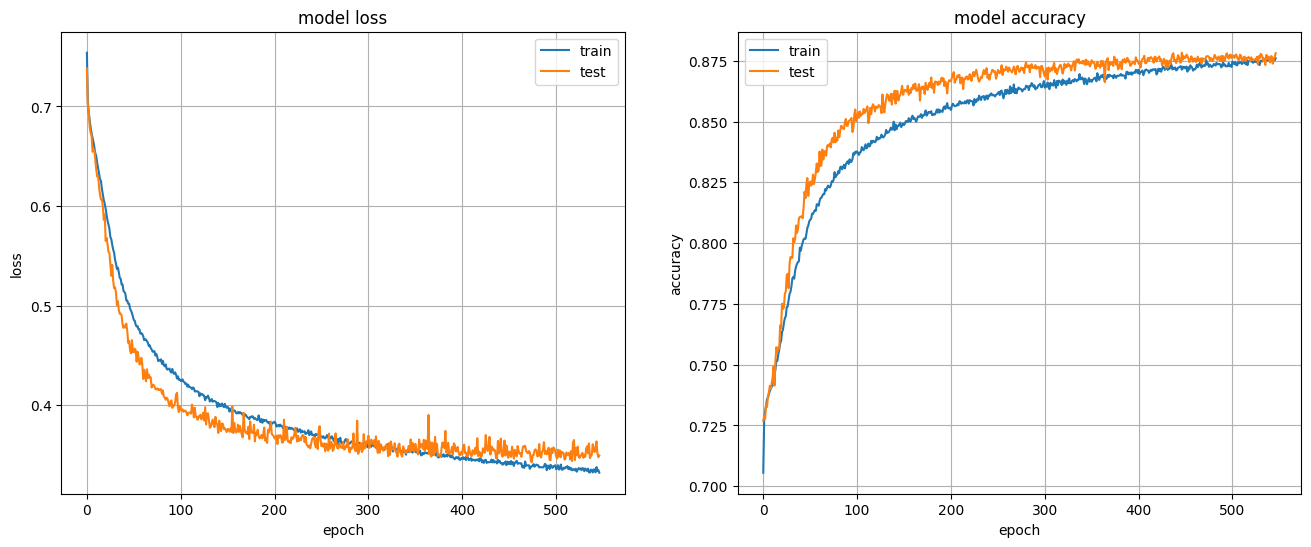

In [40]:
show_loss_accuracy_evolution(history)

In [41]:
model.evaluate(X_test, y_test)

751/751 [==============================] - 2s 3ms/step - loss: 0.3492 - accuracy: 0.8783


[0.34916630387306213, 0.8783057928085327]

751/751 [==============================] - 1s 2ms/step


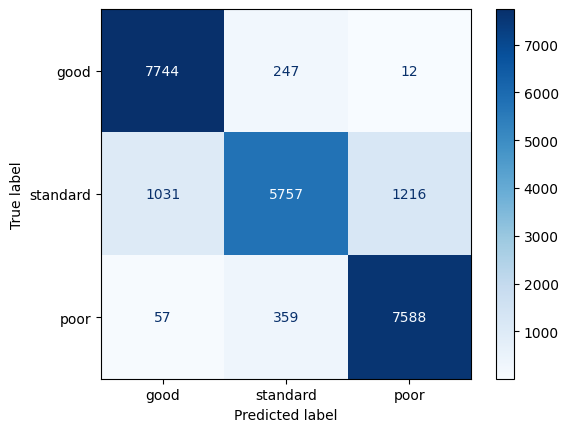

In [42]:
y_pred_nn = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_nn.argmax(axis=1), normalize=None)
cmd = ConfusionMatrixDisplay(cm, display_labels=true_label)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

In [43]:
print(classification_report(y_test, y_pred_nn.argmax(axis=1), target_names=['good', 'standard', 'poor']))

              precision    recall  f1-score   support

        good       0.88      0.97      0.92      8003
    standard       0.90      0.72      0.80      8004
        poor       0.86      0.95      0.90      8004

    accuracy                           0.88     24011
   macro avg       0.88      0.88      0.87     24011
weighted avg       0.88      0.88      0.87     24011



In [44]:
y_proba = y_pred_nn

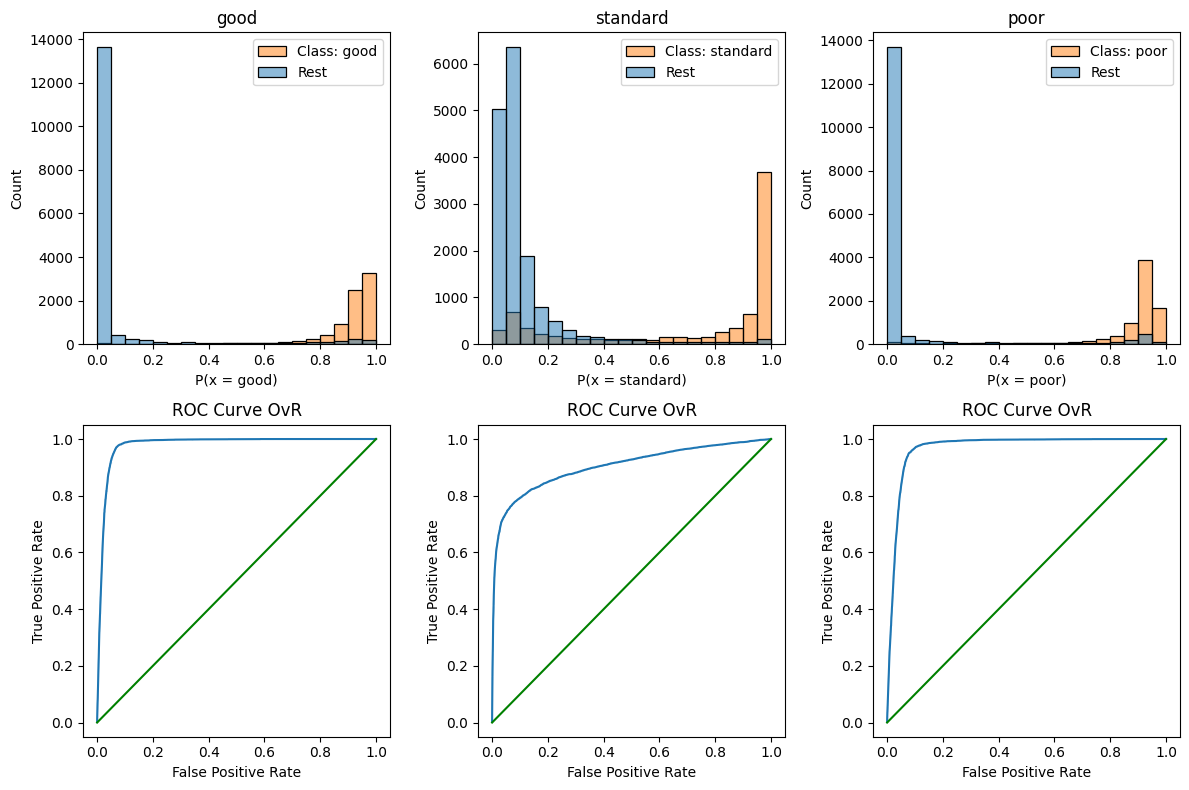

In [45]:
# Gráficos de distribuciones de probabilidad y curvas ROC Uno frente al Resto
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # extrae las clases
    c = classes[i]
    l = true_label[i]
    
    # prepara un DataFrame auxiliar para ayudar con los gráficos
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test.to_numpy()]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # gráficar la distribución de probabilidad para cada clase vs el resto
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux , hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(l)
    ax.legend([f"Class: {l}", "Rest"])
    ax.set_xlabel(f"P(x = {l})")
    
    # cálculo de las curvas ROC
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [46]:
# # @title Convert ipynb to HTML in Colab
# # Upload ipynb
# from google.colab import files
# f = files.upload()

# # Convert ipynb to html
# import subprocess
# file0 = list(f.keys())[0]
# _ = subprocess.run(["pip", "install", "nbconvert"])
# _ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# # download the html
# files.download(file0[:-5]+"html")